<a href="https://colab.research.google.com/github/mudnighrs/Fraud_Detection/blob/main/Fraud_DetectionPART1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df=pd.read_csv("/Users/lakshayasinghtanwar/Desktop/ESElab/insurance.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/14,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/06,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/90,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/14,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/91,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/14,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/03,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/11,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


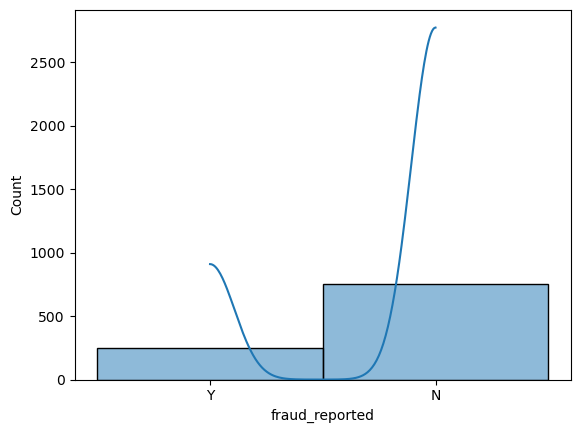

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['fraud_reported'], bins=30, kde=True)
plt.show()



In [ ]:
missing_values = df.isna().sum().to_dict()
missing_values

{'months_as_customer': 0,
 'age': 0,
 'policy_number': 0,
 'policy_bind_date': 0,
 'policy_state': 0,
 'policy_csl': 0,
 'policy_deductable': 0,
 'policy_annual_premium': 0,
 'umbrella_limit': 0,
 'insured_zip': 0,
 'insured_sex': 0,
 'insured_education_level': 0,
 'insured_occupation': 0,
 'insured_hobbies': 0,
 'insured_relationship': 0,
 'capital-gains': 0,
 'capital-loss': 0,
 'incident_date': 0,
 'incident_type': 0,
 'collision_type': 0,
 'incident_severity': 0,
 'authorities_contacted': 91,
 'incident_state': 0,
 'incident_city': 0,
 'incident_location': 0,
 'incident_hour_of_the_day': 0,
 'number_of_vehicles_involved': 0,
 'property_damage': 0,
 'bodily_injuries': 0,
 'witnesses': 0,
 'police_report_available': 0,
 'total_claim_amount': 0,
 'injury_claim': 0,
 'property_claim': 0,
 'vehicle_claim': 0,
 'auto_make': 0,
 'auto_model': 0,
 'auto_year': 0,
 'fraud_reported': 0}

In [ ]:
df_tmp = df.copy()
df_tmp

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/14,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/06,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/90,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/14,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/91,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/14,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/03,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/11,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [ ]:
for label, content in df_tmp.items():
  if content.dtype=="object":
   print(label)

policy_bind_date
policy_state
policy_csl
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_date
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
property_damage
police_report_available
auto_make
auto_model
fraud_reported


In [ ]:
for label, content in df_tmp.items():
    if content.dtype=="object":
      df_tmp[label] = content.astype("category").cat.as_ordered()

In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [ ]:
for label, content in df_tmp.items():

 if not pd.api.types.is_numeric_dtype(content):
# Add binary column to inidicate whether sample had missing value
  df_tmp[label+"_is_missing"] = pd.isnull(content)
# We add the +1 because pandas encodes missing categories as -1
  df_tmp[label] = pd.Categorical(content).codes+1

In [ ]:
 df_tmp.dtypes.to_dict()


{'months_as_customer': dtype('int64'),
 'age': dtype('int64'),
 'policy_number': dtype('int64'),
 'policy_bind_date': dtype('int16'),
 'policy_state': dtype('int8'),
 'policy_csl': dtype('int8'),
 'policy_deductable': dtype('int64'),
 'policy_annual_premium': dtype('float64'),
 'umbrella_limit': dtype('int64'),
 'insured_zip': dtype('int64'),
 'insured_sex': dtype('int8'),
 'insured_education_level': dtype('int8'),
 'insured_occupation': dtype('int8'),
 'insured_hobbies': dtype('int8'),
 'insured_relationship': dtype('int8'),
 'capital-gains': dtype('int64'),
 'capital-loss': dtype('int64'),
 'incident_date': dtype('int8'),
 'incident_type': dtype('int8'),
 'collision_type': dtype('int8'),
 'incident_severity': dtype('int8'),
 'authorities_contacted': dtype('int8'),
 'incident_state': dtype('int8'),
 'incident_city': dtype('int8'),
 'incident_location': dtype('int16'),
 'incident_hour_of_the_day': dtype('int64'),
 'number_of_vehicles_involved': dtype('int64'),
 'property_damage': dtype

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y=df_tmp["fraud_reported"]
X=df_tmp.drop("fraud_reported",axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

np.random.seed=42
from  sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

clf1=RandomForestClassifier()

clf1.fit(X_train,y_train)



RandomForestClassifier()

In [ ]:
clf1.score(X_test,y_test)


0.75

In [ ]:
np.random.seed=42

from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(criterion = "entropy")

clf2.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf2.score(X_test,y_test)


0.785

In [ ]:

from sklearn.naive_bayes import GaussianNB
clf3 =GaussianNB()

clf3.fit(X_train,y_train)

GaussianNB()

In [ ]:
clf3.score(X_test,y_test)


0.635

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
classifier.score(X_test,y_test)


0.74